In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from scipy.stats import entropy
import torch
from torch.utils.data import DataLoader, TensorDataset

In [4]:
pkl_path = '../logs_random_sae_new/random_ip_initialized_sae.pkl'

In [3]:
with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

pure_digit_coverage = {}

for sae_name, results in all_results.items():
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]
    
    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)
    
    pure_neurons = count_per_neuron[count_per_neuron == 1].index
    
    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]
    
    digit_counts = digits_represented.value_counts().sort_index()
    
    pure_digit_coverage[sae_name] = {
        "n_digits_represented": digit_counts.count(),
        "digit_counts": digit_counts.to_dict()
    }

for sae, info in pure_digit_coverage.items():
    print(f"\n{sae}:")
    print(f"  Unique digits with ≥1 pure neuron: {info['n_digits_represented']}")
    print(f"  Digit breakdown: {info['digit_counts']}")




reanim_vanilla_sae_256_10_best_loss:
  Unique digits with ≥1 pure neuron: 10
  Digit breakdown: {0: 2, 1: 11, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

reanim_vanilla_sae_512_6_best_loss:
  Unique digits with ≥1 pure neuron: 8
  Digit breakdown: {0: 7, 1: 24, 2: 1, 3: 2, 4: 3, 5: 2, 6: 6, 7: 3}

reanim_vanilla_sae_256_19_best_loss:
  Unique digits with ≥1 pure neuron: 4
  Digit breakdown: {1: 6, 3: 1, 4: 2, 9: 1}

vanilla_sae_512_12_best_loss:
  Unique digits with ≥1 pure neuron: 4
  Digit breakdown: {0: 3, 1: 1, 4: 2, 5: 1}

vanilla_sae_256_11_best_loss:
  Unique digits with ≥1 pure neuron: 0
  Digit breakdown: {}

reanim_vanilla_sae_512_19_best_loss:
  Unique digits with ≥1 pure neuron: 6
  Digit breakdown: {0: 4, 1: 10, 2: 2, 4: 2, 6: 3, 7: 3}

vanilla_sae_512_4_best_loss:
  Unique digits with ≥1 pure neuron: 9
  Digit breakdown: {0: 3, 1: 10, 2: 1, 3: 1, 4: 7, 5: 2, 6: 4, 7: 3, 9: 2}

reanim_vanilla_sae_256_1_best_loss:
  Unique digits with ≥1 pure neuron: 9
  Digit breakdo

In [6]:
all_results.keys()

dict_keys(['256', '512'])

In [7]:
sae_digit_counts = {}
auc_matrix = all_results['256']['auc_matrix']
neuron_df = all_results['256']['per_neuron_df']
summary_df = all_results['256']['sae_summary']

In [6]:
all_results

{'xavier_256': {'auc_matrix': digit              0         1         2         3         4         5  \
  neuron_idx                                                               
  0           0.740570  0.621823  0.793936  0.802383  0.928775  0.777116   
  1           0.539231  0.734808  0.674437  0.688274  0.616334  0.671290   
  2           0.504623  0.504174  0.513999  0.504639  0.499887  0.504584   
  3           0.863431  0.769619  0.598806  0.740968  0.622413  0.812593   
  4           0.898085  0.639806  0.483265  0.757029  0.623560  0.734393   
  ...              ...       ...       ...       ...       ...       ...   
  251         0.895528  0.874270  0.664221  0.775063  0.859801  0.881544   
  252         0.888824  0.587697  0.723677  0.846569  0.696094  0.704713   
  253         0.630239  0.809967  0.556886  0.639733  0.661544  0.966937   
  254         0.843980  0.879025  0.530455  0.689277  0.587372  0.857317   
  255         0.725064  0.914152  0.645570  0.860208  0.7616

In [8]:
count_per_neuron = (auc_matrix > 0.95).sum(axis=1)
pure_neurons = count_per_neuron[count_per_neuron == 1].index

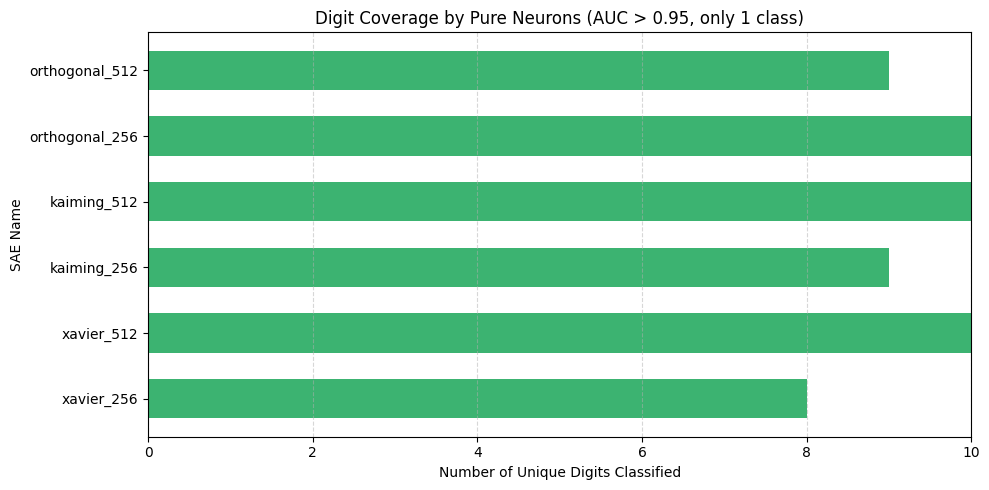

In [5]:
with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

sae_digit_counts = {}

for sae_name, results in all_results.items():
    
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]

    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)

    pure_neurons = count_per_neuron[count_per_neuron == 1].index

    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]

    if digits_represented.nunique() >= 2:
        grouped_name = sae_name.split("_best")[0]
        sae_digit_counts[grouped_name] = digits_represented.nunique()

plt.figure(figsize=(10, 5))
plt.barh(list(sae_digit_counts.keys()), list(sae_digit_counts.values()), color="mediumseagreen", height=0.6)
plt.xlabel("Number of Unique Digits Classified")
plt.ylabel("SAE Name")
plt.title(f"Digit Coverage by Pure Neurons (AUC > 0.95, only 1 class)")
plt.xlim(0, 10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.subplots_adjust(left=0.2)  
plt.tight_layout()
plt.show()

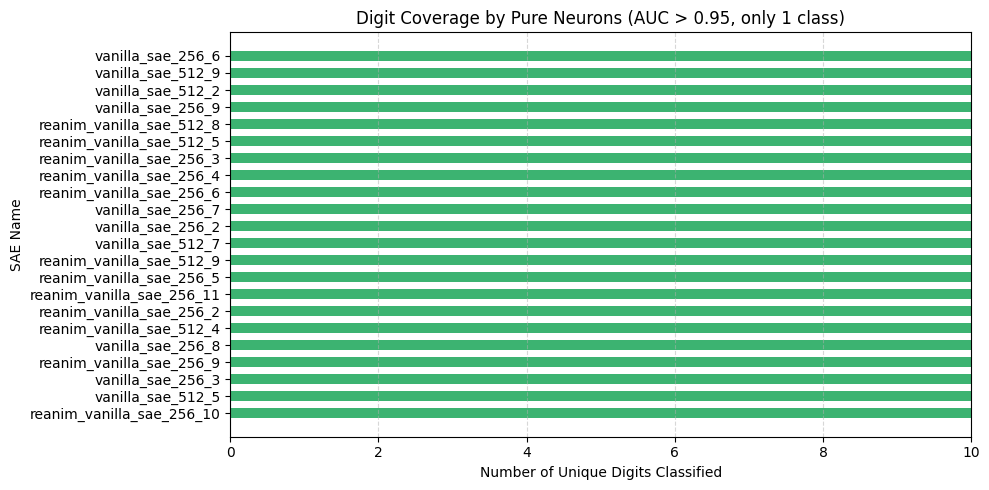

In [16]:
with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

sae_digit_counts = {}

for sae_name, results in all_results.items():
    
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]

    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)

    pure_neurons = count_per_neuron[count_per_neuron == 1].index

    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]

    if digits_represented.nunique() >= 10:
        grouped_name = sae_name.split("_best")[0]
        sae_digit_counts[grouped_name] = digits_represented.nunique()

plt.figure(figsize=(10, 5))
plt.barh(list(sae_digit_counts.keys()), list(sae_digit_counts.values()), color="mediumseagreen", height=0.6)
plt.xlabel("Number of Unique Digits Classified")
plt.ylabel("SAE Name")
plt.title(f"Digit Coverage by Pure Neurons (AUC > 0.95, only 1 class)")
plt.xlim(0, 10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.subplots_adjust(left=0.2)  
plt.tight_layout()
plt.show()